In [1]:
import pylab as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

In [2]:
data = pd.read_csv('HATS_global_F11.dat', sep=r"\s*", parse_dates=[['HATS_F11_YYYY', 'HATS_F11_MM']])
data.index=data['HATS_F11_YYYY_HATS_F11_MM']

/Users/ptg21/anaconda/envs/basemap/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
def CFCModel(y, t):
    bank = y[1]
    extra = y[2]
    tstart = y[3]
    tend = y[4]
    # add an extra source term between tstart and tend
    if t>tstart*yr and t<tend*yr:
        dy0 = bank + extra - k1*y[0]
    else:
        dy0 = bank - k1*y[0]
    return dy0, 0., 0., 0., 0.

In [4]:
nyrs = 35.
extrastart = 15.
extraend = 35.

# FIX ME!!
RMMCFC11=137.37 # g per mol
yr=365.*24.*3600.
k1 = 1./(55.*yr)

# conversion factors
Ggperyearinpptv = 1e6/5e18 *(28.8/RMMCFC11) *1e12/ yr #  Gg per year -> molecules per second

# time array for solution 
time = np.linspace(start=0.0, stop=nyrs*yr, num=nyrs)

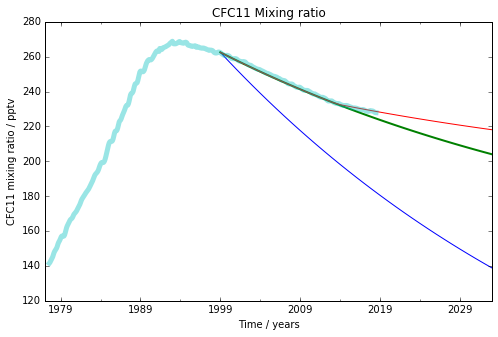

In [6]:
# null case
init = 262.5 # pptv
bank = 0. 
extra = 0.
yinit = np.array([init, bank, extra, extrastart, extraend])
y0 =  odeint(CFCModel, yinit,  time)

# case with bank emission
init = 262.5 # pptv
bank = 60.* Ggperyearinpptv # 52 Gg per year -> pptv per sec
extra = 0.
yinit = np.array([init, bank, extra, extrastart, extraend])
y1 =  odeint(CFCModel, yinit,  time)

# case with bank emission and dead lobsters
init = 262.5 # pptv
bank =  60.* Ggperyearinpptv # 52 Gg per year -> pptv per sec
extra = 20.* Ggperyearinpptv
yinit = np.array([init, bank, extra, extrastart, extraend])
y2 =  odeint(CFCModel, yinit,  time)

# create timeseries for plotting with correct date time indices
times = pd.date_range(start='1/1/1999', periods=nyrs, freq='A')
y0ts=pd.Series(data=y0[:,0], index=times)
y1ts=pd.Series(data=y1[:,0], index=times)
y2ts=pd.Series(data=y2[:,0], index=times)

# plot the data
y0ts.plot(figsize=(8,5))
y1ts.plot(lw=2)
y2ts.plot()
data['HATS_Global_F11'].plot(lw=5, alpha=0.4)
plt.title('CFC11 Mixing ratio')
plt.ylabel('CFC11 mixing ratio / pptv')
plt.xlabel('Time / years')
plt.show()